In [1]:
import matplotlib.pyplot as plt


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / "_scripts"))

In [107]:
import networkx as nx
from eppy.bunch_subclass import EpBunch
from geomeppy import IDF
import seaborn as sns
import polars as pl
import numpy as np

from case_edits.ezcase import *

from helpers.variables import *
from helpers.variable_interfaces import *
from setup.setup import *
from setup.plots import *
from setup.data_wrangle import *
from network.data_on_network import *

import matplotlib.cm as cm
import matplotlib as mpl


from matplotlib.colors import Colormap, Normalize, LinearSegmentedColormap
from setup.setup import create_directories

from helpers.ep_helpers import *
from subsurfaces.creator import SubsurfaceCreator
from airflow_network.airboundary import *
from subsurfaces.logic import find_surface_connecting_two_zones
from setup.analysis import create_data, get_airboundary_case, get_df, get_zone_df


In [36]:
all_variables.afn.zone

{'ach': 'AFN Zone Ventilation Air Change Rate',
 'vent_vol': 'AFN Zone Ventilation Volume',
 'vent_heat_gain': 'AFN Zone Ventilation Sensible Heat Gain Rate',
 'vent_heat_loss': 'AFN Zone Ventilation Sensible Heat Loss Rate'}

In [84]:
tcase = get_airboundary_case()

In [118]:
dfs = create_data(get_df)

In [119]:
dfs2 = dfs.with_columns(clean_names=pl.col("space_names").map_elements(get_simple_name_for_subsurface_or_wall, return_dtype=pl.String))
dfs2

case_names,space_names,qoi,values,datetimes,qoi_0,values_0,clean_names
str,str,str,f64,datetime[μs],str,f64,str
"""no_door""","""BLOCK 06 STOREY 0 WALL 0002_1 …","""AFN Linkage Node 1 to Node 2 V…",0.034922,2017-07-01 00:00:00,"""AFN Linkage Node 2 to Node 1 V…",0.290134,"""b6_doo_2.1"""
"""no_door""","""BLOCK 06 STOREY 0 WALL 0002_1 …","""AFN Linkage Node 1 to Node 2 V…",0.061336,2017-07-01 00:15:00,"""AFN Linkage Node 2 to Node 1 V…",0.269456,"""b6_doo_2.1"""
"""no_door""","""BLOCK 06 STOREY 0 WALL 0002_1 …","""AFN Linkage Node 1 to Node 2 V…",0.08678,2017-07-01 00:30:00,"""AFN Linkage Node 2 to Node 1 V…",0.237587,"""b6_doo_2.1"""
"""no_door""","""BLOCK 06 STOREY 0 WALL 0002_1 …","""AFN Linkage Node 1 to Node 2 V…",0.114792,2017-07-01 00:45:00,"""AFN Linkage Node 2 to Node 1 V…",0.223414,"""b6_doo_2.1"""
"""no_door""","""BLOCK 06 STOREY 0 WALL 0002_1 …","""AFN Linkage Node 1 to Node 2 V…",0.116701,2017-07-01 01:00:00,"""AFN Linkage Node 2 to Node 1 V…",0.21639,"""b6_doo_2.1"""
…,…,…,…,…,…,…,…
"""just_door""","""BLOCK 01 STOREY 0 WALL 0004 WI…","""AFN Linkage Node 1 to Node 2 V…",0.656305,2017-07-01 22:45:00,"""AFN Linkage Node 2 to Node 1 V…",0.0,"""b1_win_4"""
"""just_door""","""BLOCK 01 STOREY 0 WALL 0004 WI…","""AFN Linkage Node 1 to Node 2 V…",0.629196,2017-07-01 23:00:00,"""AFN Linkage Node 2 to Node 1 V…",0.0,"""b1_win_4"""
"""just_door""","""BLOCK 01 STOREY 0 WALL 0004 WI…","""AFN Linkage Node 1 to Node 2 V…",0.602094,2017-07-01 23:15:00,"""AFN Linkage Node 2 to Node 1 V…",0.0,"""b1_win_4"""


In [121]:
list(dfs2["clean_names"].unique())

['b0_win_3',
 'b6_doo_1.1',
 'b5_win_3',
 'b1_win_4',
 'b5_doo_2.2',
 'b1_win_2',
 'b6_doo_2.1',
 'b6_WALL_1.1',
 'b5_win_4',
 'b0_win_2',
 'b1_win_1']

In [123]:
dfs2.group_by("case_names").agg(mean_12 = pl.mean("values"), q75_12 = pl.quantile("values", 0.75), mean_21 = pl.mean("values_0"), q75_21 = pl.quantile("values_0", 0.75) )

case_names,mean_12,q75_12,mean_21,q75_21
str,f64,f64,f64,f64
"""no_door""",0.270206,0.420166,0.374052,0.525889
"""airwall""",0.277751,0.430653,0.380257,0.534724
"""just_door""",0.303794,0.518773,0.37221,0.550166
"""airwall_surf""",0.33677,0.582962,0.402781,0.60228


/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/gqenv/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


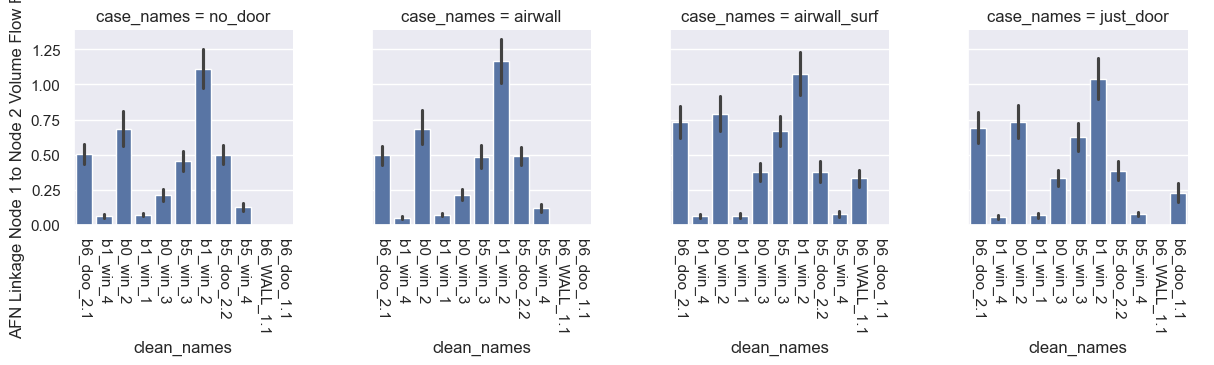

In [124]:
col = "values_0"
sns.set_theme()
g = sns.FacetGrid(dfs2.filter(pl.col(col) > 0), col="case_names")
g.map(sns.barplot,  "clean_names", col, )
g.add_legend()

_, qoi_info = get_plot_labels(tcase, dfs2["qoi"][0])
g.set_ylabels(qoi_info)
g.set_xticklabels(rotation=-90)


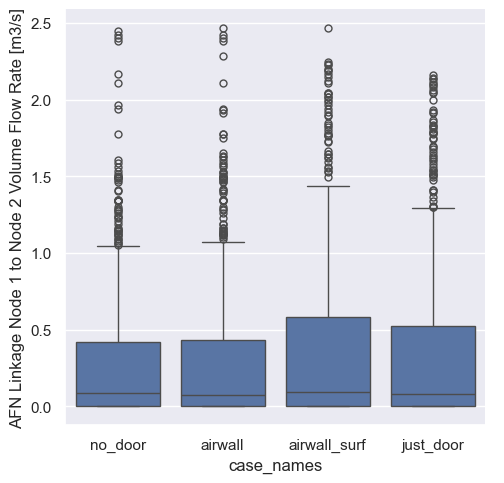

In [125]:
g = sns.catplot(data=dfs, x="case_names", y="values", kind="box")

tcase = get_airboundary_case()
_, qoi_info = get_plot_labels(tcase, dfs["qoi"][0])
g.set_ylabels(qoi_info)



In [126]:
zone_dfs = create_data(get_zone_df)
zone_dfs

case_names,space_names,qoi,values,datetimes,qoi_0,values_0
str,str,str,f64,datetime[μs],str,f64
"""no_door""","""BLOCK 00 STOREY 0""","""AFN Zone Ventilation Air Chang…",87.715277,2017-07-01 00:00:00,"""AFN Zone Ventilation Volume""",354.479362
"""no_door""","""BLOCK 00 STOREY 0""","""AFN Zone Ventilation Air Chang…",89.769726,2017-07-01 00:15:00,"""AFN Zone Ventilation Volume""",362.781904
"""no_door""","""BLOCK 00 STOREY 0""","""AFN Zone Ventilation Air Chang…",90.812316,2017-07-01 00:30:00,"""AFN Zone Ventilation Volume""",366.995274
"""no_door""","""BLOCK 00 STOREY 0""","""AFN Zone Ventilation Air Chang…",90.123577,2017-07-01 00:45:00,"""AFN Zone Ventilation Volume""",364.211906
"""no_door""","""BLOCK 00 STOREY 0""","""AFN Zone Ventilation Air Chang…",85.873049,2017-07-01 01:00:00,"""AFN Zone Ventilation Volume""",347.034459
…,…,…,…,…,…,…
"""just_door""","""BLOCK 06 STOREY 0""","""AFN Zone Ventilation Air Chang…",0.0,2017-07-01 22:45:00,"""AFN Zone Ventilation Volume""",0.0
"""just_door""","""BLOCK 06 STOREY 0""","""AFN Zone Ventilation Air Chang…",0.0,2017-07-01 23:00:00,"""AFN Zone Ventilation Volume""",0.0
"""just_door""","""BLOCK 06 STOREY 0""","""AFN Zone Ventilation Air Chang…",0.0,2017-07-01 23:15:00,"""AFN Zone Ventilation Volume""",0.0


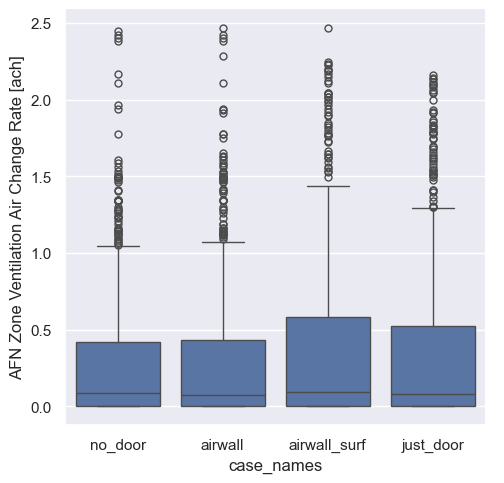

In [127]:
g = sns.catplot(data=dfs, x="case_names", y="values", kind="box")

tcase = get_airboundary_case()
_, qoi_info = get_plot_labels(tcase, zone_dfs["qoi"][0])
g.set_ylabels(qoi_info)


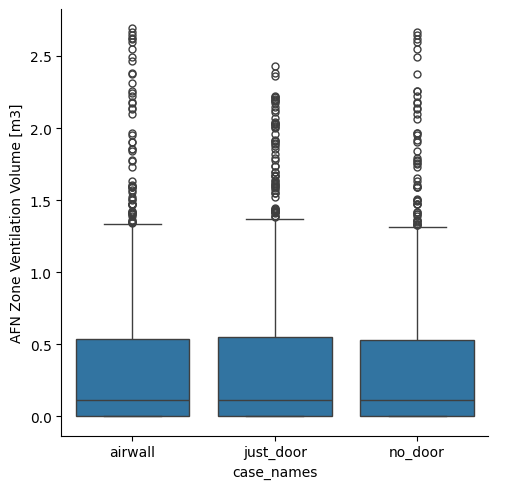

In [77]:
g = sns.catplot(data=dfs, x="case_names", y="values_0", kind="box")

tcase = get_airboundary_case()
_, qoi_info = get_plot_labels(tcase, zone_dfs["qoi_0"][0])
g.set_ylabels(qoi_info)

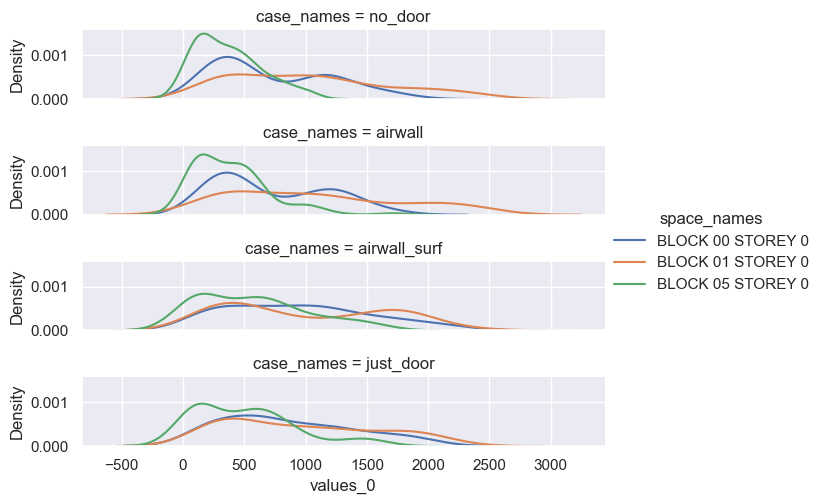

In [138]:
qoi = "values_0"
g = sns.FacetGrid(zone_dfs.filter(pl.col(col) > 0), row="case_names", hue="space_names", height=1.3, aspect=5)
g.map(sns.kdeplot,  qoi,)
g.add_legend()

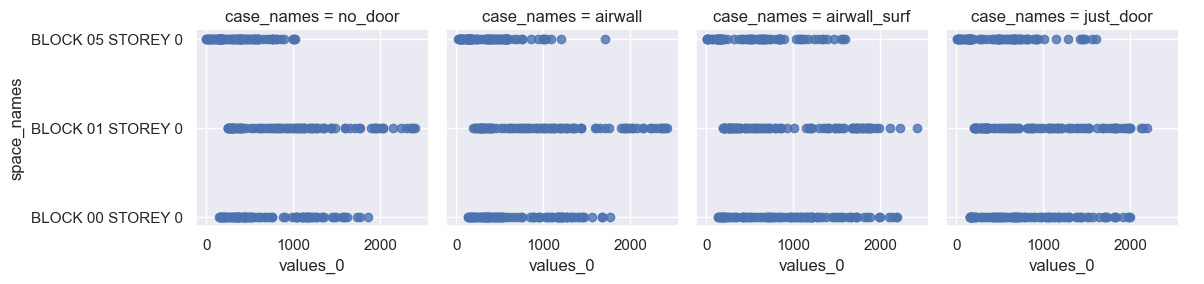

In [128]:
col = "values_0"
g = sns.FacetGrid(zone_dfs.filter(pl.col(col) > 0), col="case_names")
g.map(sns.regplot,  col, "space_names",fit_reg=False )
g.add_legend()

In [26]:
all_variables.afn.linkage

{'flow12': 'AFN Linkage Node 1 to Node 2 Volume Flow Rate',
 'flow21': 'AFN Linkage Node 2 to Node 1 Volume Flow Rate'}

In [76]:
outputs_folder="airboundary"
# create_cases(outputs_folder) amb1 is failing.. 

In [15]:
inputs_dir = "case_bol_5"
outputs_dir = "tests/test23_airwall"
path_to_inputs, path_to_outputs = retrieve_paths(inputs_dir, outputs_dir)
# case = initialize_case(path_to_outputs)
# case.idf = add_rooms(case.idf, path_to_inputs)

In [21]:
case = create_ezcase(outputs_dir, inputs_dir)

out.idf does not exist


## running case

In [116]:
inputs_dir = "case_bol_5"
outputs_dir = ""
case = create_ezcase(outputs_dir, inputs_dir)

out.idf does not exist


In [117]:
# case.run_idf()

idf has changed - running case

/Applications/EnergyPlus-22-2-0/energyplus --weather /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/weather_data/PALO_ALTO/CA_PALO-ALTO-AP_724937_23.EPW --output-directory /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/tests/test25_airwall/results --idd /Applications/EnergyPlus-22-2-0/Energy+.idd /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/base/01example/Minimal_AP_a6c9a1.idf

EnergyPlus Starting
EnergyPlus, Version 22.2.0-c249759bad, YMD=2024.10.30 12:54
Adjusting Air System Sizing
Adjusting Standard 62.1 Ventilation Sizing
Initializing Simulation
Reporting Surfaces
Beginning Primary Simulation
Initializing New Environment Parameters
Warming up {1}
Warming up {2}
Warming up {3}
Warming up {4}
Warming up {5}
Warming up {6}
Starting Simulation at 07/01/2017 for SUMMERDAY
Writing tabular output file results using HTML format.
Writing final SQL reports
EnergyPlus Run Time=00hr 00min  0.38sec


EnergyPlus Completed Successfully.


In [28]:
case_data = retrieve_case_data(inputs_dir, outputs_dir, "test23_airwall")
case_data

CaseData(case_name='test23_airwall', idf=<geomeppy.idf.IDF object at 0x13209fb20>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/tests/test23_airwall/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_bol_5'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/tests/test23_airwall'))

In [30]:
from setup.analysis import get_qois


qois = get_qois()
df = create_dataframe_for_all_cases([case_data], qois[0])
df1 = join_any_data(df, [case_data], qois[1])
df1

case_names,space_names,qoi,values,datetimes,qoi_0,values_0
str,str,str,f64,datetime[μs],str,f64
"""test23_airwall""","""BLOCK 06 STOREY 0 WALL 0002_1 …","""AFN Linkage Node 1 to Node 2 V…",0.029073,2017-07-01 00:00:00,"""AFN Linkage Node 2 to Node 1 V…",0.2872
"""test23_airwall""","""BLOCK 06 STOREY 0 WALL 0002_1 …","""AFN Linkage Node 1 to Node 2 V…",0.06914,2017-07-01 00:15:00,"""AFN Linkage Node 2 to Node 1 V…",0.217171
"""test23_airwall""","""BLOCK 06 STOREY 0 WALL 0002_1 …","""AFN Linkage Node 1 to Node 2 V…",0.077211,2017-07-01 00:30:00,"""AFN Linkage Node 2 to Node 1 V…",0.230185
"""test23_airwall""","""BLOCK 06 STOREY 0 WALL 0002_1 …","""AFN Linkage Node 1 to Node 2 V…",0.104032,2017-07-01 00:45:00,"""AFN Linkage Node 2 to Node 1 V…",0.214703
"""test23_airwall""","""BLOCK 06 STOREY 0 WALL 0002_1 …","""AFN Linkage Node 1 to Node 2 V…",0.104966,2017-07-01 01:00:00,"""AFN Linkage Node 2 to Node 1 V…",0.206483
…,…,…,…,…,…,…
"""test23_airwall""","""BLOCK 05 STOREY 0 WALL 0004 WI…","""AFN Linkage Node 1 to Node 2 V…",0.852451,2017-07-01 22:45:00,"""AFN Linkage Node 2 to Node 1 V…",0.0
"""test23_airwall""","""BLOCK 05 STOREY 0 WALL 0004 WI…","""AFN Linkage Node 1 to Node 2 V…",0.816675,2017-07-01 23:00:00,"""AFN Linkage Node 2 to Node 1 V…",0.0
"""test23_airwall""","""BLOCK 05 STOREY 0 WALL 0004 WI…","""AFN Linkage Node 1 to Node 2 V…",0.78082,2017-07-01 23:15:00,"""AFN Linkage Node 2 to Node 1 V…",0.0


In [13]:

ab = case.idf.newidfobject("CONSTRUCTION:AIRBOUNDARY")
ab.Air_Exchange_Method


CONSTRUCTION:AIRBOUNDARY,
    ,                         !- Name
    None,                     !- Air Exchange Method
    0.5;                      !- Simple Mixing Air Changes per Hour

In [80]:
vars = get_vars([all_variables.afn, all_variables.zone, all_variables.site])
vars

['AFN Zone Ventilation Air Change Rate',
 'AFN Zone Ventilation Volume',
 'AFN Zone Ventilation Sensible Heat Gain Rate',
 'AFN Zone Ventilation Sensible Heat Loss Rate',
 'AFN Node Temperature',
 'AFN Node Total Pressure',
 'AFN Node Wind Pressure',
 'AFN Linkage Node 1 to Node 2 Volume Flow Rate',
 'AFN Linkage Node 2 to Node 1 Volume Flow Rate',
 'AFN Surface Venting Window or Door Opening Factor',
 'Zone Mean Air Temperature',
 'Zone Air Heat Balance Surface Convection Rate',
 'Zone Air Heat Balance Interzone Air Transfer Rate',
 'Zone Air Heat Balance Outdoor Air Transfer Rate',
 'Zone Air Heat Balance Air Energy Storage Rate',
 'Zone Outdoor Air Wind Speed',
 'Zone Outdoor Air Wind Direction',
 'Site Outdoor Air Drybulb Temperature',
 'Site Outdoor Air Wetbulb Temperature',
 'Site Outdoor Air Dewpoint Temperature',
 'Site Direct Solar Radiation Rate per Area',
 'Site Diffuse Solar Radiation Rate per Area',
 'Site Solar Azimuth Angle',
 'Site Wind Speed',
 'Site Wind Direction']

In [81]:
case.sql.available_outputs

('Site Outdoor Air Dewpoint Temperature',
 'Zone Outdoor Air Wind Direction',
 'AFN Node Wind Pressure',
 'Site Wind Direction',
 'Site Solar Azimuth Angle',
 'Zone Air Heat Balance Outdoor Air Transfer Rate',
 'AFN Linkage Node 2 to Node 1 Volume Flow Rate',
 'AFN Node Temperature',
 'AFN Zone Ventilation Volume',
 'Site Diffuse Solar Radiation Rate per Area',
 'AFN Linkage Node 1 to Node 2 Volume Flow Rate',
 'AFN Surface Venting Window or Door Opening Factor',
 'Site Outdoor Air Drybulb Temperature',
 'Site Direct Solar Radiation Rate per Area',
 'Site Wind Speed',
 'AFN Zone Ventilation Sensible Heat Loss Rate',
 'Site Outdoor Air Wetbulb Temperature',
 'AFN Zone Ventilation Sensible Heat Gain Rate',
 'AFN Node Total Pressure',
 'AFN Zone Ventilation Air Change Rate',
 'Zone Air Heat Balance Interzone Air Transfer Rate',
 'Zone Air Heat Balance Air Energy Storage Rate',
 'Zone Mean Air Temperature',
 'Zone Air Heat Balance Surface Convection Rate',
 'Site Solar Altitude Angle',
 'Z

In [82]:
qoi1 = 'AFN Linkage Node 1 to Node 2 Volume Flow Rate'
qoi12 = 'AFN Linkage Node 2 to Node 1 Volume Flow Rate'
qois = [qoi1, qoi12]
collection = get_collection_for_variable(case.sql, qois[0])

bol_5
bol_5
bol_5
Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/airboundary/case_bol_5/results/eplusout.sql
bol_5
Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/airboundary/case_bol_5/results/eplusout.sql
red_b1
red_b1
red_b1
Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/airboundary/case_red_b1/results/eplusout.sql
red_b1
Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/airboundary/case_red_b1/results/eplusout.sql


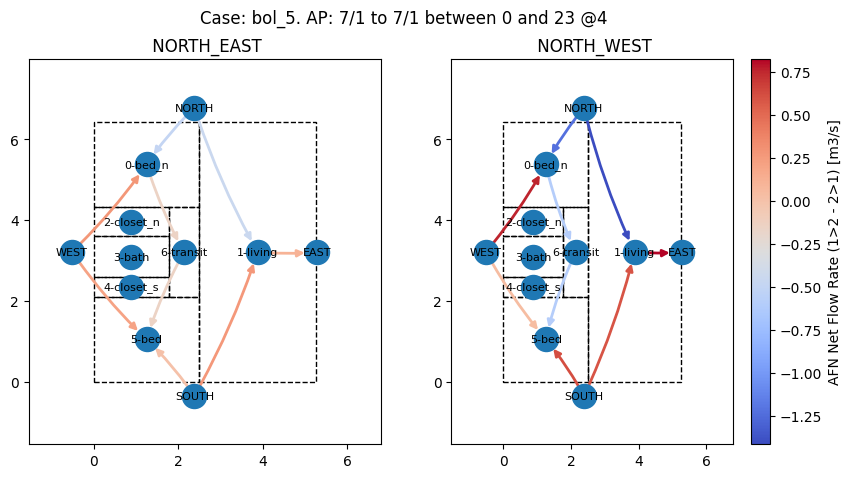

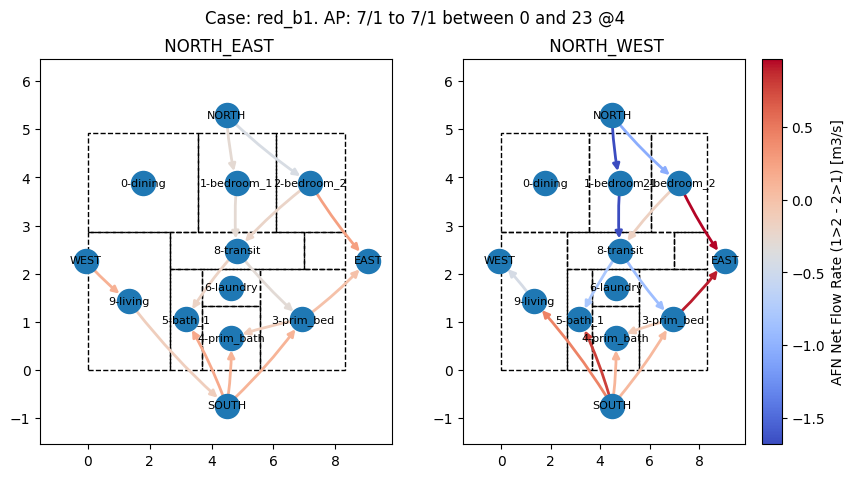

In [10]:
save_figures_for_all_cases("airboundary", "airboundary")

In [56]:
_, bol, _ = create_directories()
input_dir = "case_bol_5"
output_dir = "tests/test23_airwall"
path_to_inputs, path_to_outputs = retrieve_paths(input_dir, output_dir)
case = initialize_case(path_to_outputs)
case.idf = add_rooms(case.idf, path_to_inputs)
case

EPCaseEditor(test23_airwall)

In [48]:
o = case.idf.newidfobject("CONSTRUCTION:AIRBOUNDARY")
o.Name = f"AirBoundary"

ab_pairs = get_airboundary_pairs_from_case(path_to_inputs)
for pair in ab_pairs:
    surf = find_surface_connecting_two_zones(case.idf, pair)
    assert surf
    surf.Construction_Name = o.Name 
    partner_surf = get_partner_of_surface(case.idf, surf)
    assert partner_surf
    partner_surf.Construction_Name = o.Name

In [57]:
case.idf = update_air_boundary_constructions(case.idf, path_to_inputs)

In [58]:
case.idf.getsurfaces()

[
 BUILDINGSURFACE:DETAILED,
     Block 00 Storey 0 Wall 0002,    !- Name
     wall,                     !- Surface Type
     Project Wall,             !- Construction Name
     Block 00 Storey 0,        !- Zone Name
     ,                         !- Space Name
     outdoors,                 !- Outside Boundary Condition
     ,                         !- Outside Boundary Condition Object
     SunExposed,               !- Sun Exposure
     WindExposed,              !- Wind Exposure
     autocalculate,            !- View Factor to Ground
     autocalculate,            !- Number of Vertices
     2.5,                      !- Vertex 1 Xcoordinate
     6.44,                     !- Vertex 1 Ycoordinate
     3.05,                     !- Vertex 1 Zcoordinate
     2.5,                      !- Vertex 2 Xcoordinate
     6.44,                     !- Vertex 2 Ycoordinate
     0,                        !- Vertex 2 Zcoordinate
     0,                        !- Vertex 3 Xcoordinate
     6.44,          

In [59]:
case.idf = add_subsurfaces(case.idf, path_to_inputs)
case.idf = add_airflownetwork(case.idf)

case.idf = add_all_output_requests(case.idf)
case.compare_and_save()

out.idf does not exist


In [60]:
all_subsurf = [i.Name for i in case.idf.getsubsurfaces()]
len(set(all_subsurf)) == len(all_subsurf)

True

In [61]:
case.run_idf()

idf has changed - running case

/Applications/EnergyPlus-22-2-0/energyplus --weather /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/weather_data/PALO_ALTO/CA_PALO-ALTO-AP_724937_23.EPW --output-directory /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/tests/test23_airwall/results --idd /Applications/EnergyPlus-22-2-0/Energy+.idd /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/base/01example/Minimal_AP_fda4a3.idf

EnergyPlus Starting
EnergyPlus, Version 22.2.0-c249759bad, YMD=2024.10.30 07:56
Adjusting Air System Sizing
Adjusting Standard 62.1 Ventilation Sizing
Initializing Simulation
Reporting Surfaces
Beginning Primary Simulation
Initializing New Environment Parameters
Warming up {1}
Warming up {2}
Warming up {3}
Warming up {4}
Warming up {5}
Warming up {6}
Starting Simulation at 07/01/2017 for SUMMERDAY
Writing tabular output file results using HTML format.
Writing final SQL reports
EnergyPlus Run Time=00hr 00min  0.37sec


EnergyPlus Completed Successfully.
